This tutorial is from  https://github.com/krishnaik06/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ  -- credicts

In [1]:
import pandas as pd
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
training_set = dataset_train.iloc[:, 1:2].values

In [2]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [3]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)



In [6]:
print(X_train.shape)

(1198, 60, 1)


In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [28]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

In [9]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))

# Adding the output layer
regressor.add(Dense(units = 1))



regressor.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)               

In [11]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Fitting the RNN to the Training set
filepath='my_model.h5'
check=ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32,callbacks=[check])

Epoch 1/100
1198/1198 [==============================] - 38s 32ms/step - loss: 0.0514
Epoch 2/100


C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1198/1198 [==============================] - 26s 22ms/step - loss: 0.0155
Epoch 3/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0138
Epoch 4/100
1198/1198 [==============================] - 29s 24ms/step - loss: 0.0139
Epoch 5/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0124
Epoch 6/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0109
Epoch 7/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0102
Epoch 8/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0106
Epoch 9/100
1198/1198 [==============================] - 29s 24ms/step - loss: 0.0096
Epoch 10/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0082
Epoch 11/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0077
Epoch 12/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0085
Epoch 13/100
1198/1198 [==============================] - 22s 1

In [15]:

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [16]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
real_stock_price.shape

(20, 1)

In [ ]:
# as we have taken previous 60 rime steps and test data is not sufficient so we will append from the train data

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [21]:
inputs.shape

(80,)

In [22]:
 # preparing data for prediction
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [23]:
X_test=[]
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [24]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [31]:
# regressor=load_model(filepath)

In [25]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

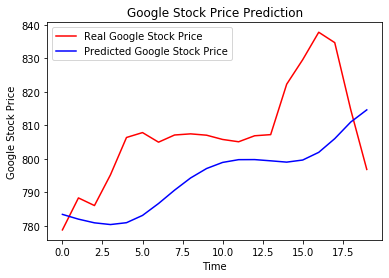

In [33]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()